<a href="https://www.inove.com.ar"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ekLfw0AsoodcZkIONBznVKnsM7SsYW-qx66kYaiTAsZ5TZ0_lNLxuRqJWiuuL6j0UwjKa_ArO89y74bcX0GARWYhJMA04Soox_OYmNOohb9_NE2zwAYK7KMOtAj8tDowysed7ergBwBThxGU2epAm8=w1366-h239-no?authuser=0" width="1000" align="center"></a>
<h1><center>Hello world!</center></h1>
<h4>Sobre este ejemplo</h4>
En este ejemplo se ejemplifica como resolver cuanto vale el valor de las propiedades de una determinada zona utilizando machine linearning.

In [1]:
# Instalamos dependencias
!pip install -U kaleido
import shutil
try:
  f = open("/content/gibioplot/gibioplot.py")
except:
  !git clone https://github.com/HectorInove/gibioplot.git
try:
  shutil.copy("/content/gibioplot/gibioplot.py", "/content/gibioplot.py")
except:
  pass

     |████████████████████████████████| 74.0MB 76kB/s 
Cloning into 'gibioplot'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [2]:
# Importamos librerías
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gibioplot
from sklearn import linear_model
%matplotlib inline

# Flagg para renderizado de imágenes,
# True para renderizar como imagenes.png
# False para imagen interactiva

PNG_RENDER = True

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Recolectar datos

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3dp4dMGFr2D00UyD0240fBNyrzptD5onOf1wkHioTvEo-RpDmNEP61ssGPS4IiSKtDEwUHaU8krqeFZi3mjkiQDE72dtJy9zxptu48TYzfnbQp-O1WFZ0LFaXDG-jIz01IQyw2fZJzEFhnk_zK-glgP=w1366-h133-no?authuser=0" width="1000" align="middle"></div>
Descargamos el dataset de alquiler de departamentos

In [3]:
#!wget -O propiedades.csv http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Mendoza
!wget -O propiedades.csv http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Capital%20Federal

--2020-09-25 00:28:46--  http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Capital%20Federal
Resolving inove.pythonanywhere.com (inove.pythonanywhere.com)... 35.173.69.207
Connecting to inove.pythonanywhere.com (inove.pythonanywhere.com)|35.173.69.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111364 (109K) [text/csv]
Saving to: ‘propiedades.csv’

propiedades.csv     100%[===================>] 108.75K   205KB/s    in 0.5s    

2020-09-25 00:29:01 (205 KB/s) - ‘propiedades.csv’ saved [111364/111364]



# Procesar datos

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ecH_bbd3CY23v8dqfIsuoE1FT7dDeRqxlG4Ti4RzKkOqAHMTD8ukvX7wx_G2PkKFQjNeoGGtL3xoqhCqfKCSdk1lE_2FuTiQaV2jDy3_fZeVbBxgEhtVwGnoLhBfQyb36KZxHPn0puUpJV825MBkQJ=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

In [4]:
df = pd.read_csv("propiedades.csv")
des = df.describe()
des.loc['Nan'] = df.isnull().sum()
des.loc['%Nan'] = (df.isnull().mean())*100
des

,Unnamed: 0,latitud,longitud,precio,m2,ambientes
count,500.000000,500.000000,500.000000,500.000000,498.000000,496.000000
mean,249.500000,-34.436349,-58.350430,34845.114000,67.702871,2.147177
std,144.481833,3.686153,3.511219,47535.753817,67.764244,1.529677
min,0.000000,-38.001750,-120.740135,27.000000,0.000000,0.000000
25%,124.750000,-34.605990,-58.439109,3475.000000,35.000000,1.000000
50%,249.500000,-34.594786,-58.416721,25000.000000,45.500000,2.000000
75%,374.250000,-34.580576,-58.392528,40000.000000,71.750000,3.000000
max,499.000000,47.751076,-34.588875,450000.000000,700.000000,18.000000
Nan,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.400000,0.800000


In [5]:
# Sacamos todas las filas de la tabla las cuales el campo "m2" o "ambientes" se encuentre vacio
df_clean = df[df['m2'].notna()]
df_clean = df_clean[df_clean['ambientes'].notna()]

# Explorar datos

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ePJ3-PFgVLwddhdqRi7z7VRo8j3r6LBSRPzWNek5805rJeEdWJKIbAKGj133aGArHgu1oe8-IDj9ET8FtAW0R5GrUOcPzgG0nnUFhfIRyug0VQ_2DwNB_zmMuReBy60ExzOQprBc8us4HlthdvRtx6=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

> Bloc con sangría



In [6]:
print('Cantidad de departamentos en observacion:', df_clean.shape[0])
df_clean.head()

Cantidad de departamentos en observacion: 496


,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,2020_09_25,-34.611270,-58.363780,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,2020_09_25,-34.586830,-58.439266,https://departamento.mercadolibre.com.ar/MLA-8...,Loft Duplex Palermo Hollywood Amoblado Alqui...,Departamento,79000.0,ARS,70.0,2.0
2,2,2020_09_25,-34.601160,-58.376804,https://departamento.mercadolibre.com.ar/MLA-8...,Dueño Alquila 1 Amb. Amoblado - Caba - Zona:...,Departamento,23500.0,ARS,30.0,1.0
3,3,2020_09_25,-34.548042,-58.466156,https://departamento.mercadolibre.com.ar/MLA-8...,Departamento Equipado Y Amueblado Muy Buen Estado,Departamento,80000.0,ARS,130.0,5.0
4,4,2020_09_25,-34.612488,-58.426605,https://departamento.mercadolibre.com.ar/MLA-8...,"Alquiler Temporario , Zona Hospital Italiano",Departamento,2000.0,ARS,60.0,2.0


## Nos quedamos solamente con aquellas filas que el precio haya sido informado en pesos Argentinos

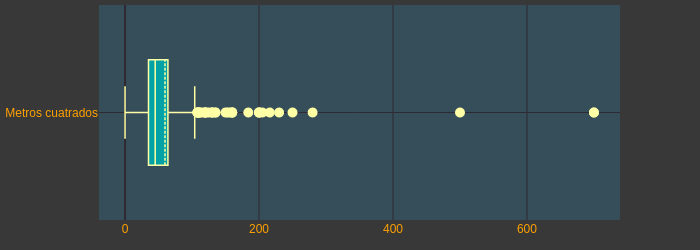

In [7]:
# Filtramos el dataframe
df_ars = df_clean[df_clean['moneda'] == 'ARS']
# Renderizamos el gráfico
title = 'Metros cuatrados'
if PNG_RENDER:
    filename = title + '.png'
    gibioplot.boxplot(title=title, dataset=df_ars['m2'], render='png')
else:
    gibioplot.boxplot(title=title, dataset=df_ars['m2'])

In [8]:
print('Cantidad de departamentos en observacion:', df_ars.shape[0])

Cantidad de departamentos en observacion: 423


## Eliminar los elementos que se van fuera del rango de análisis

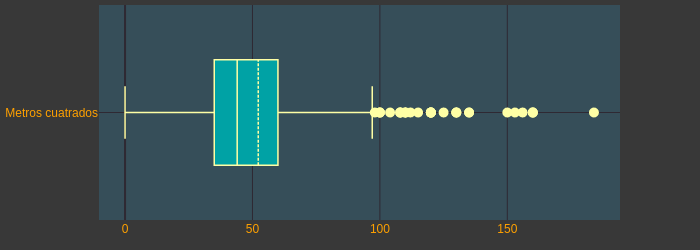

In [9]:
# Nos quedamos solamente con los deparamentos menor a 200m2
propiedades = df_ars[df_ars['m2'] < 200]
# Renderizamos el gráfico
title = 'Metros cuatrados'
if PNG_RENDER:
    filename = title + '.png'
    gibioplot.boxplot(title=title, dataset=propiedades['m2'], render='png')
else:
    gibioplot.boxplot(title=title, dataset=propiedades['m2'])

In [10]:
print('Cantidad de departamentos en observacion:', propiedades.shape[0])

Cantidad de departamentos en observacion: 412


# Entrenar modelo

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3csSQnxbKYYltM7w3bryOXpVvhrxI8PZ-xHKtEleb8SiwPjx_vNiCIfYQUVVUtCUz5zyhyCGqCjj9mWlHcXqmSZpHL5lrQrCcnbg0tRQiWYmATPeAzVKVrQGCA22rH7R9QrQsOFjeXmw3z4a17k_GTn=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

In [11]:
# Calcular y visualizar le prediccion de costos por m2
regr = linear_model.LinearRegression()
#x = np.asanyarray(propiedades[['ambientes','m2']])
x = np.asanyarray(propiedades[['m2']])
y = np.asanyarray(propiedades['precio'])
regr.fit(x, y)
#y_hat= regr.predict(propiedades[['ambientes','m2']])
y_hat= regr.predict(propiedades[['m2']])

# Validar modelo

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3cak4pQwIT8LrDUfrv0XXdf9MfEDbCytI3Yttzzd8BG0AyqJ74FpFe5kVMZ0UoKguSjr3-_qKe1Qg2eWEk5YalKmtcwGFV5OS2CmmoVsEPIRpUZeg4SzIDrcQDRTGNP-9RPT4q1VVXrHtCdCZDYrfgW=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

Error medio: 5.90


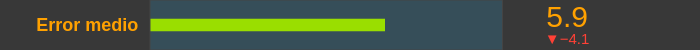

In [12]:
title = 'Error medio'
error_medio = np.mean(np.absolute((y_hat - y)/y))
print(title+": %.2f" % error_medio)
value = error_medio
reference = 10
if PNG_RENDER:
    filename = title + '.png'
    gibioplot.plot_meter(title=title, value=value, render='png', filename=filename)
else:
    gibioplot.plot_meter(title=title, value=value, reference=reference)

# Utilizar modelo

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3cCImYtu1CcKuITmTpV7hyJmrEt_8ADIqZiqlksAyNwCvcwR8sDZLQl54gmo4sobCgb3vpuzjWAFDkBh6cT33oBYTMJMyltD25Q8einZ37Gx_9gsCLI50iBX1wo3fz5c0BaedWiyJs3MdHotbxnkSjg=w1366-h133-no?authuser=0" width="1000" align="middle"
></div>

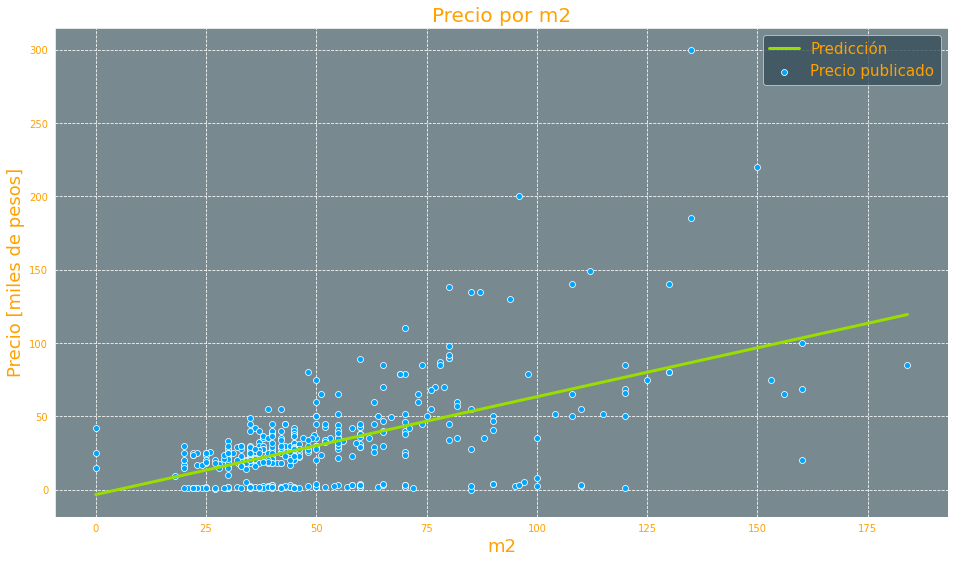

In [13]:
gibioplot.plot_dot_line(propiedades['m2'],propiedades['precio'],y_hat)

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3c0b9wdQXhFVvYu-h9-AsPEg621I8En-CINRW5eJhYJweohC0gQ-8j-ZftxoZ6TXZWQbFRoLxNCH_xLHjnEEUMMKg9k72CQU8Zyd2if6CFBPWV_8umCQXI543v6o1cOhk5001p-pKe8wIOb2eSa2KN7=w1366-h133-no?authuser=0" width="1000" align="middle"></div>